In [108]:
import glob
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import specgram
import pandas as pd
import librosa.display
import IPython.display
import soundfile as sf

%matplotlib inline

In [109]:
files = glob.glob('UrbanSound8K/audio/fold1/*')

In [110]:
len(files)

873

In [111]:
class_map = {'0' : 'air_conditioner', '1' : 'car_horn', '2' : 'children_playing', '3' : 'dog_bark', '4' : 'drilling', 
                 '5' : 'engine_idling', '6' : 'gun_shot', '7' : 'jackhammer', '8' : 'siren', '9' : 'street_music'}
pd.DataFrame(sorted(list(class_map.items())))

,0,1
0,0,air_conditioner
1,1,car_horn
2,2,children_playing
3,3,dog_bark
4,4,drilling
5,5,engine_idling
6,6,gun_shot
7,7,jackhammer
8,8,siren
9,9,street_music


In [114]:
samples = [(class_map[label], [f for f in files if f.split('-')[1] == label][0]) 
           for label in class_map.keys()]

In [115]:
samples

[('street_music', 'UrbanSound8K/audio/fold1\\108041-9-0-11.wav'),
 ('engine_idling', 'UrbanSound8K/audio/fold1\\103258-5-0-0.wav'),
 ('jackhammer', 'UrbanSound8K/audio/fold1\\103074-7-0-0.wav'),
 ('air_conditioner', 'UrbanSound8K/audio/fold1\\127873-0-0-0.wav'),
 ('drilling', 'UrbanSound8K/audio/fold1\\14113-4-0-0.wav'),
 ('children_playing', 'UrbanSound8K/audio/fold1\\105415-2-0-1.wav'),
 ('gun_shot', 'UrbanSound8K/audio/fold1\\102305-6-0-0.wav'),
 ('siren', 'UrbanSound8K/audio/fold1\\106905-8-0-0.wav'),
 ('car_horn', 'UrbanSound8K/audio/fold1\\156194-1-0-0.wav'),
 ('dog_bark', 'UrbanSound8K/audio/fold1\\101415-3-0-2.wav')]

In [153]:
def get_sound_data(path, sr=22050):
    data, fsr = sf.read(path)
    data_22k = librosa.resample(data.T, fsr, sr)
    if len(data_22k.shape) > 1:
        data_22k = np.average(data_22k, axis=0)
    return data_22k, sr

In [158]:
sample_data = [(sample[0], get_sound_data(sample[1])) for sample in samples]

In [160]:
[(sample[0], sample[1][0].shape) for sample in sample_data]

[('street_music', (88200,)),
 ('engine_idling', (88200,)),
 ('jackhammer', (88200,)),
 ('air_conditioner', (44982,)),
 ('drilling', (88200,)),
 ('children_playing', (88200,)),
 ('gun_shot', (57551,)),
 ('siren', (88200,)),
 ('car_horn', (5513,)),
 ('dog_bark', (88200,))]

In [162]:
for data in sample_data:
    print(data[0], ':')
    IPython.display.display(IPython.display.Audio(data=data[1][0], rate=data[1][1]))

street_music :


engine_idling :


jackhammer :


air_conditioner :


drilling :


children_playing :


gun_shot :


siren :


car_horn :


dog_bark :


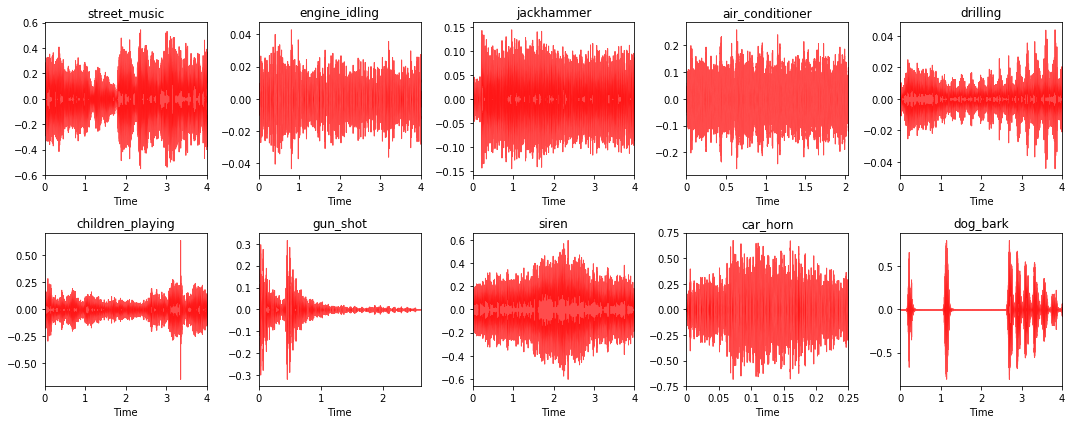

In [171]:
i = 1
fig = plt.figure(figsize=(15, 6))
for item in sample_data:
    plt.subplot(2, 5, i)
    librosa.display.waveplot(item[1][0], sr=item[1][1], color='r', alpha=0.7)
    plt.title(item[0])
    i += 1
plt.tight_layout()

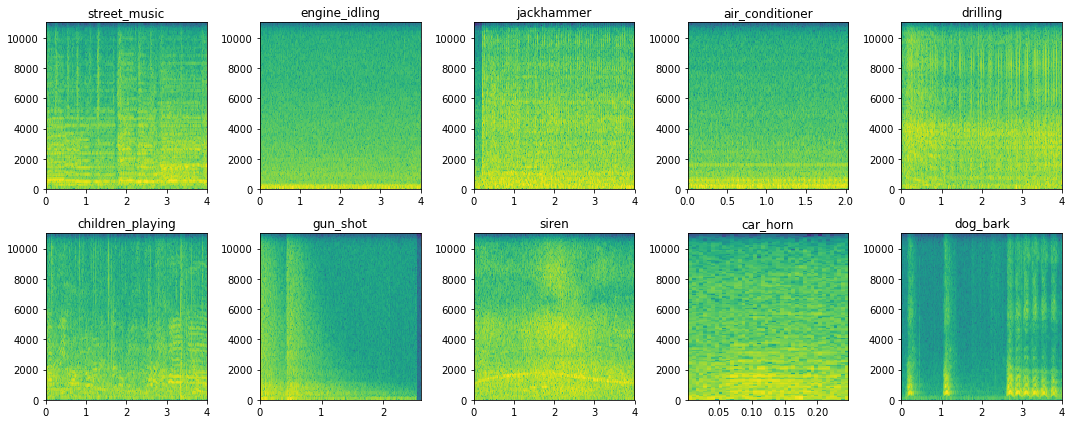

In [172]:
i = 1
fig = plt.figure(figsize=(15, 6))
for item in sample_data:
    plt.subplot(2, 5, i)
    specgram(item[1][0], Fs=item[1][1])
    plt.title(item[0])
    i += 1
plt.tight_layout()

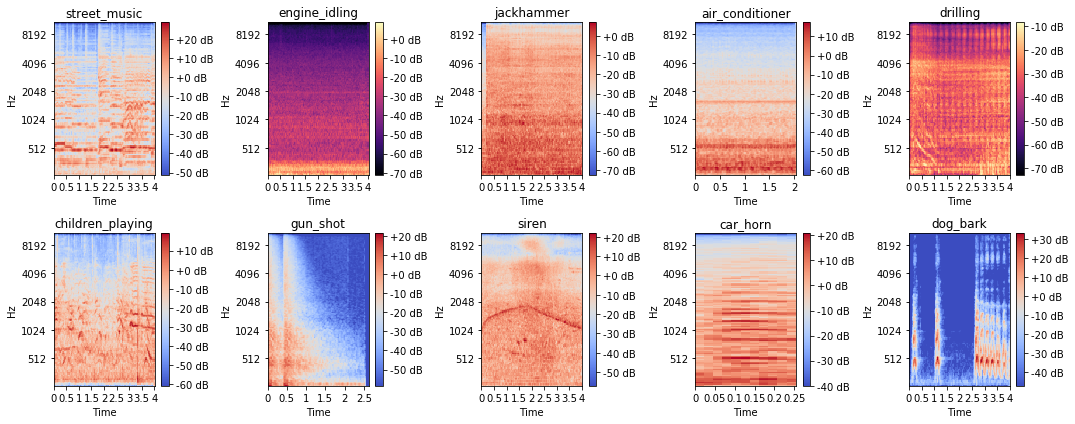

In [199]:
i = 1
fig = plt.figure(figsize=(15, 6))
for item in sample_data:
    plt.subplot(2, 5, i)
    S = librosa.feature.melspectrogram(item[1][0], sr=item[1][1], n_mels=128)
    log_S = librosa.logamplitude(S)
    librosa.display.specshow(log_S, sr=item[1][1], x_axis='time', y_axis='mel')
    plt.title(item[0])
    plt.colorbar(format='%+02.0f dB')
    i += 1
plt.tight_layout()

In [428]:
y = sample_data[6][1][0]

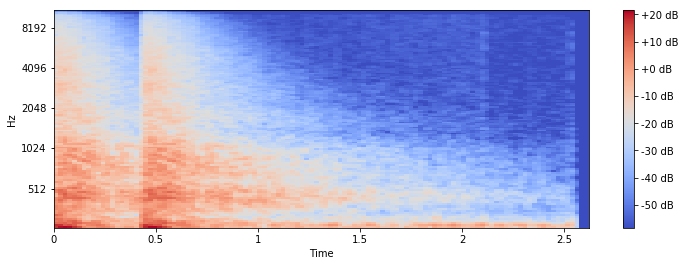

In [429]:
S = librosa.feature.melspectrogram(y, sr=22050, n_mels=128)
log_S = librosa.logamplitude(S)
plt.figure(figsize=(12,4))
librosa.display.specshow(log_S, sr=22050, x_axis='time', y_axis='mel')
plt.colorbar(format='%+02.0f dB')

In [430]:
y_harmonic, y_percussive = librosa.effects.hpss(y)

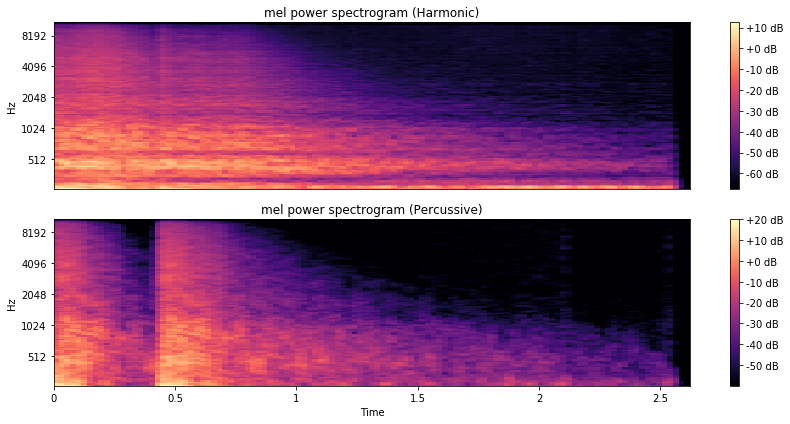

In [431]:
S_harmonic   = librosa.feature.melspectrogram(y_harmonic, sr=22050, n_mels=128)
S_percussive = librosa.feature.melspectrogram(y_percussive, sr=22050)
log_Sh = librosa.power_to_db(S_harmonic)
log_Sp = librosa.power_to_db(S_percussive)

# Make a new figure
plt.figure(figsize=(12,6))

plt.subplot(2,1,1)
librosa.display.specshow(log_Sh, sr=sr, y_axis='mel')
plt.title('mel power spectrogram (Harmonic)')
plt.colorbar(format='%+02.0f dB')

plt.subplot(2,1,2)
librosa.display.specshow(log_Sp, sr=sr, x_axis='time', y_axis='mel')
plt.title('mel power spectrogram (Percussive)')
plt.colorbar(format='%+02.0f dB')
plt.tight_layout()

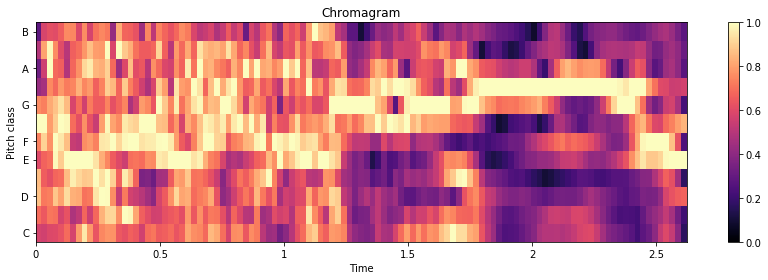

In [432]:
C = librosa.feature.chroma_cqt(y=y_harmonic, sr=sr)

# Make a new figure
plt.figure(figsize=(12, 4))

# Display the chromagram: the energy in each chromatic pitch class as a function of time
# To make sure that the colors span the full range of chroma values, set vmin and vmax
librosa.display.specshow(C, sr=sr, x_axis='time', y_axis='chroma', vmin=0, vmax=1)

plt.title('Chromagram')
plt.colorbar()

plt.tight_layout()